<div style="padding:5px; font-size: 24px; font-weight: bold; text-align: center">Employee Performance On Past Data Analysis</div>

<div style="background-color:lightblue; padding:5px; font-size: 16px; font-weight: bold">Problem Statement:</div>
<div style="background-color:lightblue; padding:5px; font-size: 16px; font-weight: normal">Conduct a comprehensive analysis of a dataset containing employee performance based on past data to understand insights, trends.</div>

<div style="background-color:lightblue; padding:5px; font-size: 16px; font-weight: bold"> Objectives:

**Importing necessary Modules**:
- Import the modules necessary for Data Manipulation and Visualization.

**Reading dataset**:
- Read the dataset containing employee performance information.

**Task 1 - Exploring the Dataset**:
- Understand the Structure and various datatypes of the attributes within the dataset.

**Task 2 - Missing value analysis**:
- Identify and analyze missing values in the dataset.

**Task 3 - Data Cleaning and Preparation**:
- Clean the data and perform analysis to uncover key insights.

**Task 4 - Univariate Analysis**:
- Conduct univariate analysis to explore the distribution and characteristics of individual variables.

**Task 5 - Outliers**:
- Identify and analyze outliers within the dataset to understand their impact on the analysis.

**Task 6 - Merging Datasets**:
- Identify and merge different Datasets for further analysis.

**Task 7 - Bivariate analysis**:
- Conduct bivariate analysis to explore relationships between different variables and their impact.

**Task 8 - Multivaiate analysis**:
- Analyze the relationships between various features in the dataset and evaluate how they influence the target variable.

<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:bold; font-style: italic">Data Processing</div>

In [387]:
!pip install pandas numpy matplotlib seaborn --quiet
!pip install xgboost lightgbm catboost --quiet

<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:bold; font-style: italic">Task 1 : Libraries Importing and Data Reading</div>

In [389]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix,auc, classification_report,recall_score, f1_score, precision_score, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
#Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [390]:
# Reading the Dataset
df_test = pd.read_csv('Test_data.csv')

In [391]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [392]:
df_test.shape

(23490, 13)

<div style="padding:10px; font-size:14px; background-color: lightblue; font-weight:bold; font-style: italic">The given dataframe has 23490 rows and 13 columns.</div>

<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:bold; font-style: italic">Step 2: Understanding the Data.</div>

In [395]:
df_test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [396]:
# Check data types of columns and nulls
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [397]:
# Categorical columns 
categorical_cols = df_test.select_dtypes(include = ['object']).columns.tolist()
print("categorical_columns:" ,categorical_cols)
## Numerical columns
# Columns with int data 
int_cols = df_test.select_dtypes(include= ['int64']).columns.tolist()
# Columns with float data
float_cols = df_test.select_dtypes(include =['float64']).columns.tolist()
print("integer_columns:", int_cols) 
print("float_columns:", float_cols) 

categorical_columns: ['department', 'region', 'education', 'gender', 'recruitment_channel']
integer_columns: ['employee_id', 'no_of_trainings', 'age', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
float_columns: ['previous_year_rating']


In [398]:
df_test['recruitment_channel'].value_counts

<bound method IndexOpsMixin.value_counts of 0        sourcing
1           other
2           other
3           other
4        sourcing
           ...   
23485    sourcing
23486    sourcing
23487    sourcing
23488    sourcing
23489       other
Name: recruitment_channel, Length: 23490, dtype: object>

In [399]:
df_test['awards_won?'].value_counts()

awards_won?
0    22955
1      535
Name: count, dtype: int64

In [400]:
#Since there are null values let us check for the count of missing values in each column
df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [401]:
# checking number of unique values in each column
df_test.nunique()

employee_id             23490
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings             9
age                        41
previous_year_rating        5
length_of_service          34
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
dtype: int64

In [402]:
# Check for duplicate rows if any available
print(df_test.duplicated().sum())

0


<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:bold; font-style: italic">Converting gender to Binary variables (m/f) to 1/0 </div>

In [404]:
# Convert gender from 'm'/'f' to binary format: 0 for male, 1 for female
df_test['gender'] = df_test['gender'].map({'m': 0, 'f': 1})
# Print the updated DataFrame
print(df_test)

       employee_id         department     region         education  gender  \
0             8724         Technology  region_26        Bachelor's       0   
1            74430                 HR   region_4        Bachelor's       1   
2            72255  Sales & Marketing  region_13        Bachelor's       0   
3            38562        Procurement   region_2        Bachelor's       1   
4            64486            Finance  region_29        Bachelor's       0   
...            ...                ...        ...               ...     ...   
23485        53478              Legal   region_2   Below Secondary       0   
23486        25600         Technology  region_25        Bachelor's       0   
23487        45409                 HR  region_16        Bachelor's       1   
23488         1186        Procurement  region_31        Bachelor's       0   
23489         5973         Technology  region_17  Master's & above       0   

      recruitment_channel  no_of_trainings  age  previous_year_

In [405]:
print(df_test['gender'].value_counts())
df_test['gender'].value_counts(normalize=True) * 100  # Percentage
imbalance_ratio = (df_test['gender'] == 0).sum() / (df_test['gender'] == 1).sum()
imbalance_ratio 

gender
0    16596
1     6894
Name: count, dtype: int64


2.4073107049608353

<div style="padding:10px; font-size:14px; background-color: lightblue; font-weight:bold; font-style: italic"> We have seen that there are two columns that have null values in dataframe. We will make changes to it in the cleaning part. There are no duplicate rows.And we use Binary classification for gender to better understand in the visualization. </div>

<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:bold; font-style: italic">STEP 3: DATA CLEANING AND PREPARATION</div>

<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:bold; font-style: italic"><b> Missing Data Handling</div>

In [409]:
# Calculating Missing Values Percentage
100*(df_test.isna().mean()).sort_values(ascending = False)

previous_year_rating    7.713921
education               4.401873
employee_id             0.000000
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:normal; font-style: italic"><b>As we can see that percentage of missing values is very low so we will not drop any cloumns.</div>

<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:bold; font-style: italic"><b> Categorical Column</div>

<b> so we are imputing the missing values using the mode for Categorical columns and Median for Numerical columns.

In [413]:
# education missing values to be imputed with mode
df_test['education'].fillna(df_test['education'].mode()[0], inplace=True)

In [414]:
#check for columns with one unique value, count and freq is same
df_test.describe(include = 'object')

,department,region,education,recruitment_channel
count,23490,23490,23490,23490
unique,9,34,3,3
top,Sales & Marketing,region_2,Bachelor's,other
freq,7315,5299,16612,13078


<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:bold; font-style: italic"><b> Numerical Column</div>

<b> checking Outliers

In [417]:
#Calculate Q1 (25th percentile) and Q3 (75th percentile)
quartile_1 = df_test['previous_year_rating'].quantile(0.25)
quartile_3 = df_test['previous_year_rating'].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = quartile_3 - quartile_1

# Define lower and upper bounds for outliers
lower_bound = quartile_1 - 1.5 * IQR
upper_bound = quartile_3 + 1.5 * IQR

# Filter out the outliers
outliers = df_test[(df_test['previous_year_rating'] < lower_bound) | 
                       (df_test['previous_year_rating'] > upper_bound)]

# Print the number of outliers found
print("Number of outliers in 'previous_year_rating':", outliers.shape[0])

Number of outliers in 'previous_year_rating': 2680


In [418]:
# Using the median based on the above output
df_test['previous_year_rating'].fillna(df_test['previous_year_rating'].median(), inplace=True)

In [419]:
#verify that there is not any missing values
df_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [420]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,0,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,1,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,0,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,1,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,0,sourcing,1,30,4.0,7,0,0,61


<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:normal; font-style: italic"><b>We have cleaned the data by imputing numerical column with median and categorical column with mode.</b>

<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:normal; font-style: italic"><b> Step 4: Exploratry Data Analysis</div>

<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:normal; font-style: italic"><b>step 4.1 :- Univeriate Analysis</b>

<b> A] We utilized count plots for categorical columns analysis:-

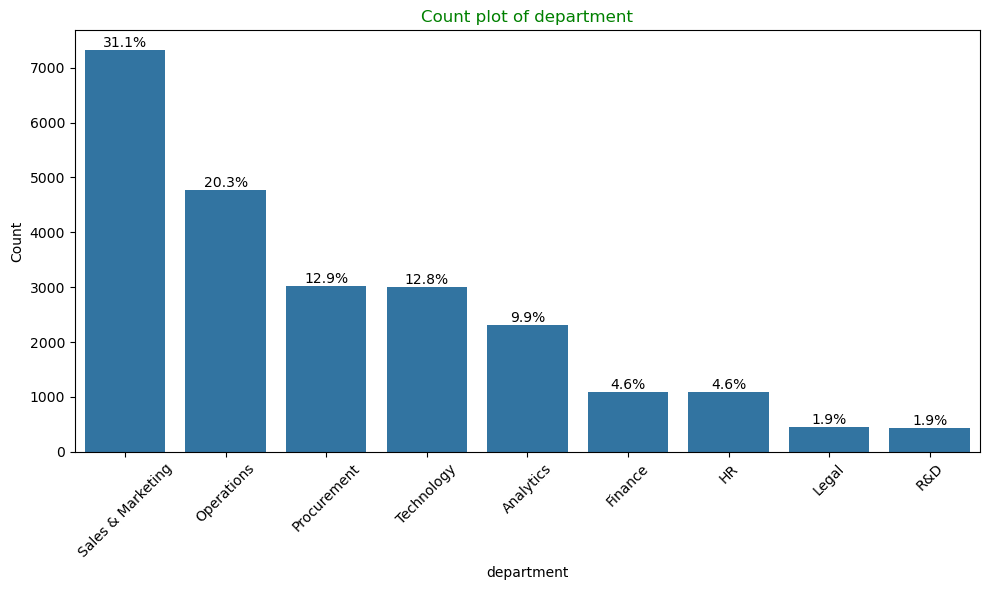

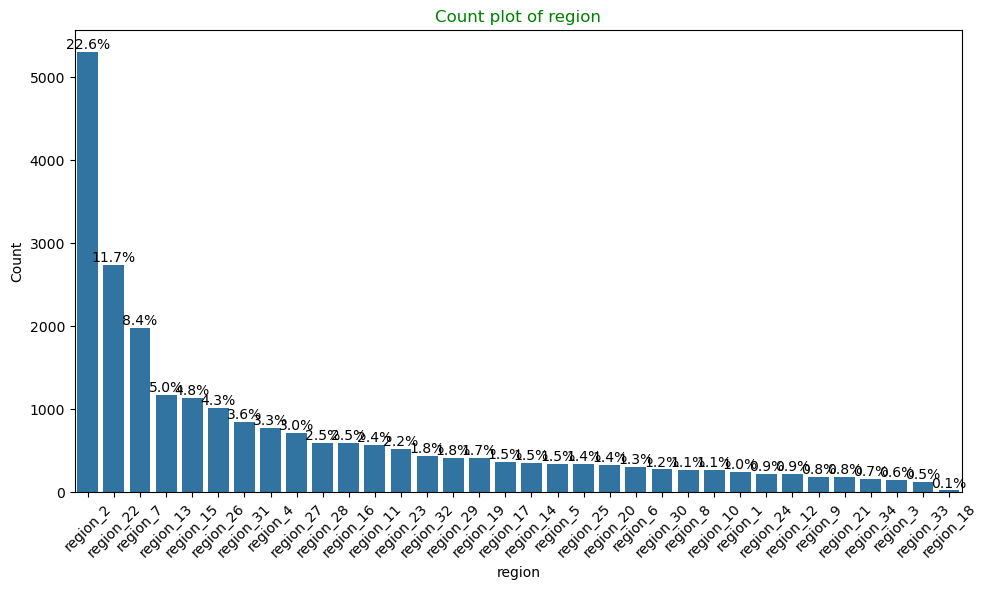

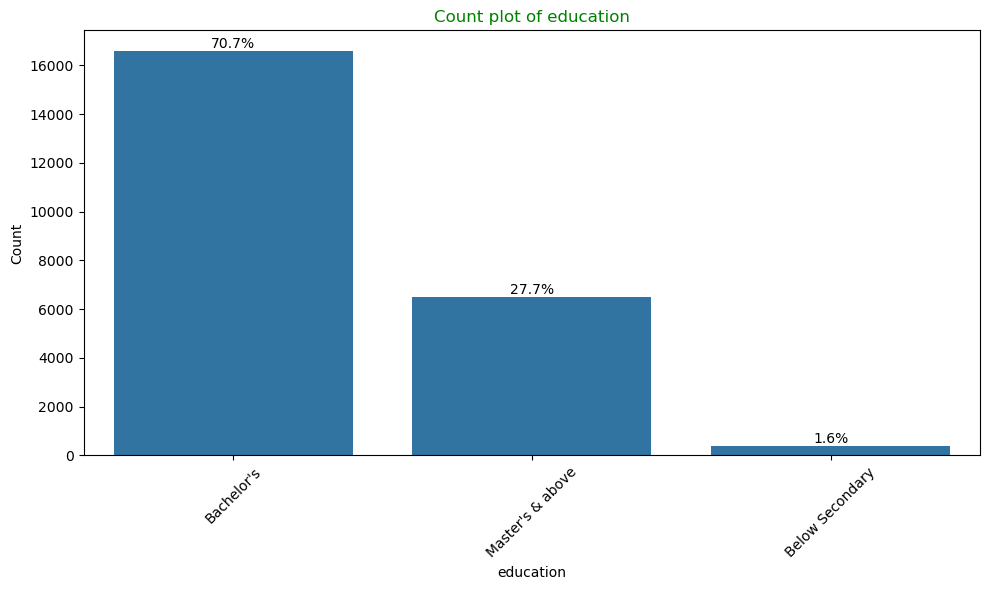

In [425]:
categorical_cols = ['department', 'region', 'education']


# Initialize figure with a specific size
for col in categorical_cols:
    plt.figure(figsize=[10,6])

    # Create the countplot
    ax = sns.countplot(data=df_test, x=col, order=df_test[col].value_counts().index)

    # Set title and labels
    plt.title(f'Count plot of {col}', color="green")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Add annotation for count bars
    total = len(df_test)  # Total number of records in the dataset
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        text = '{:.1f}%'.format(percentage)
        
        # Position for the annotation
        x = p.get_x() + p.get_width() / 2.
        y = height
        
        # Annotate the text on the plot
        ax.annotate(text, (x, y), ha='center', va='center', 
                    xytext=(0, 5), textcoords='offset points')

    # Ensure layout is tight for better appearance
    plt.tight_layout()
    # Show the plot
    plt.show()

<B> B] Univeriate analysis for numerical data.

Gender variable on Pie chart

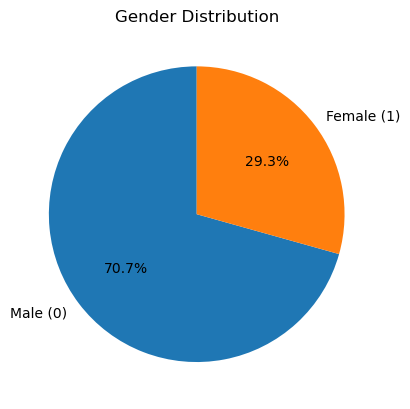

In [428]:
gender = df_test['gender']
gender_counts = gender.value_counts()
# Plot the pie chart
plt.pie(gender_counts, labels=['Male (0)', 'Female (1)'], autopct='%1.1f%%', startangle=90)

# Set title
plt.title('Gender Distribution')
plt.show()

- Utilize the 4 variables on subplots seperately to undestand the which factors important for further analysis. 

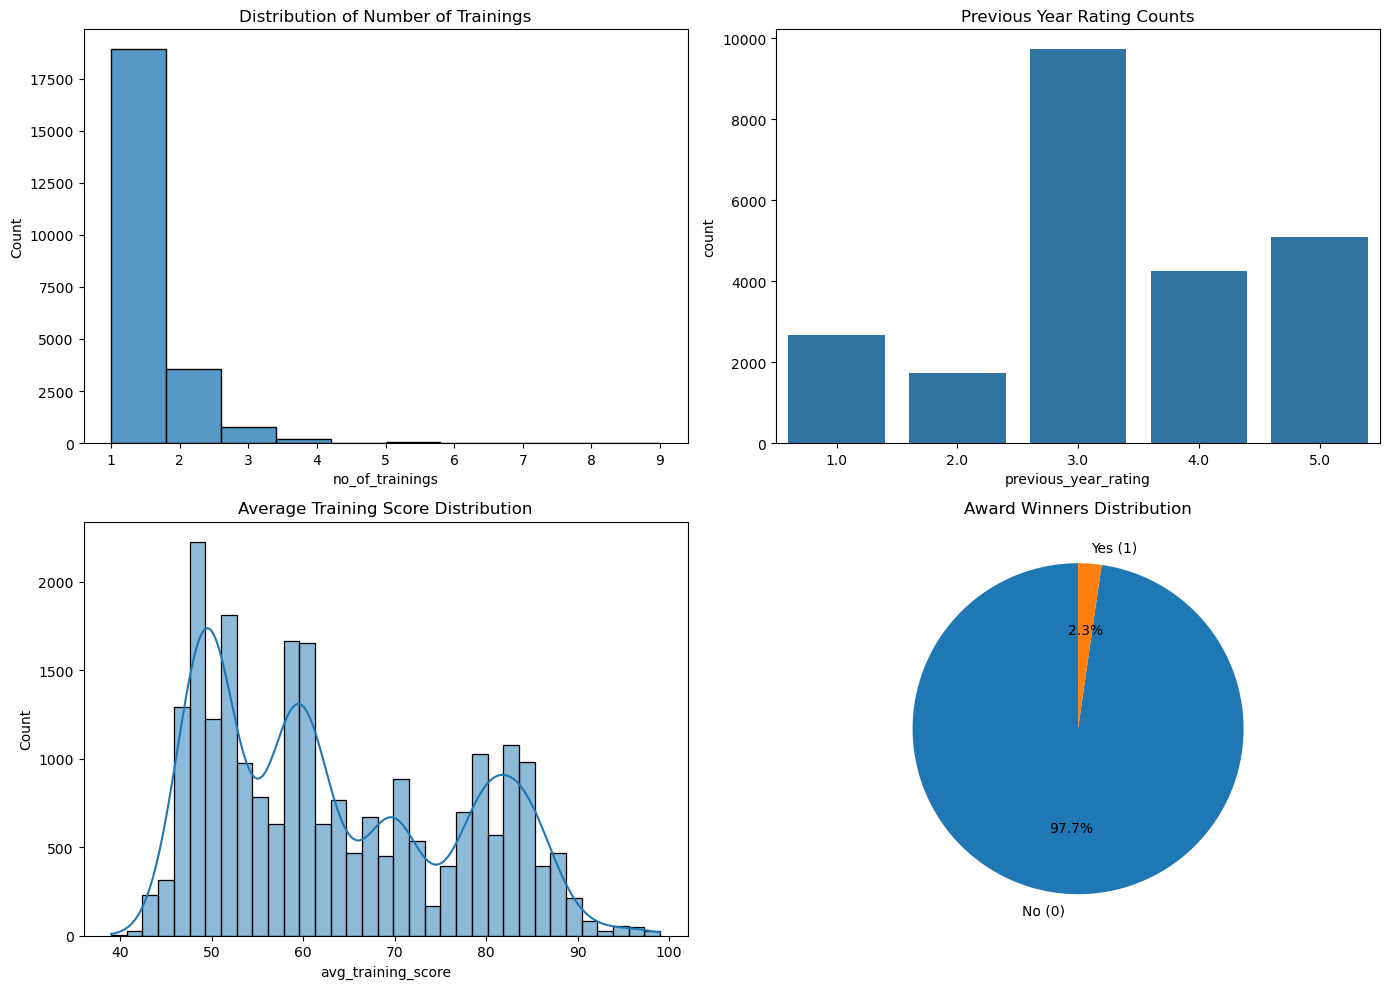

In [430]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Plot 1: Distribution of Number of Trainings (bottom-left)
sns.histplot(data=df_test, x='no_of_trainings', bins=10, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Number of Trainings')

# Plot 2: Previous Year Rating Counts (bottom-right)
sns.countplot(data=df_test, x='previous_year_rating', ax=axes[0, 1])
axes[0, 1].set_title('Previous Year Rating Counts')


# Plot 3: Average Training Score Distribution (top-left)
sns.histplot(data=df_test, x='avg_training_score', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Average Training Score Distribution')


#plot 4 : Awards Won ? (top-right)
award_counts = df_test['awards_won?'].value_counts()
plt.pie(award_counts, labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Award Winners Distribution')


# Layout adjustment
plt.tight_layout()
plt.show()


<B> KPI>80% Achivement variable using Pie chart analysis:-

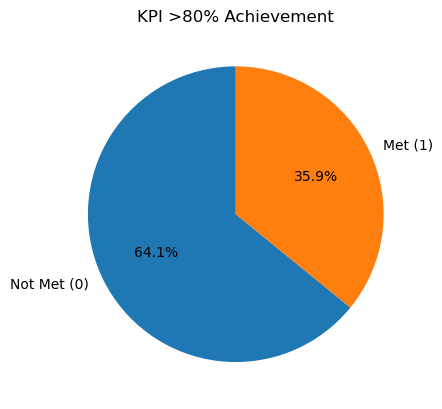

In [432]:
# Count 0s and 1s directly
kpi_counts = df_test['KPIs_met >80%'].value_counts()
# Labels as strings for clarity in the pie chart
labels = ['Not Met (0)', 'Met (1)']
# Plot the pie chart with proper labels and percentages
plt.pie(kpi_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('KPI >80% Achievement')
plt.show()

<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:bold; font-style: italic"><b> Step 4.2:-  Bivariate Analysis </b>

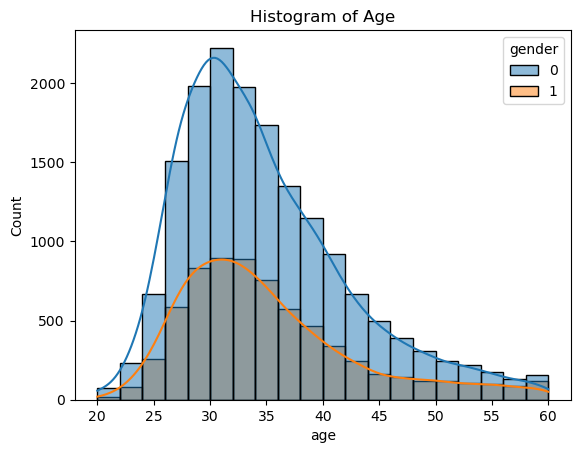

In [434]:
# differnece in male ,female gap use age wise - Hist plot
sns.histplot(data=df_test, x='age', bins=20, kde=True, hue = 'gender')
plt.title('Histogram of Age')
plt.show()

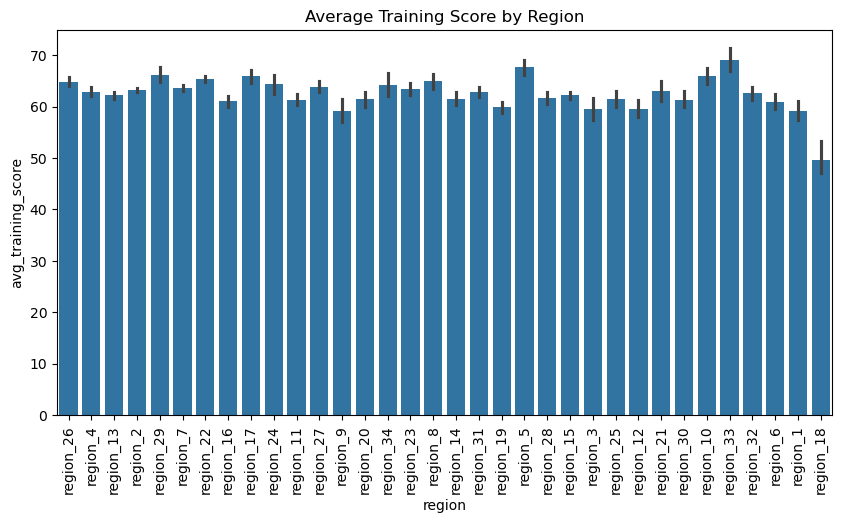

In [435]:
# Region wise People give ratings - Bar plot 
plt.figure(figsize = [10,5])
sns.barplot(data = df_test, x= 'region', y='avg_training_score')
plt.title('Average Training Score by Region')
plt.xticks(rotation=90)
plt.show()

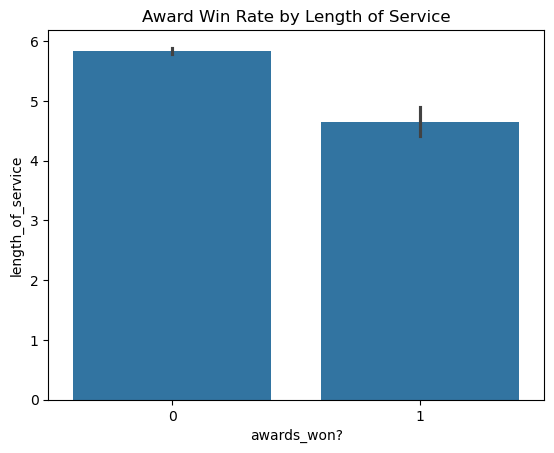

In [436]:
# Employee awards won on basis of Length of service -Bar plot 
sns.barplot(data=df_test, x='awards_won?', y='length_of_service')
plt.title('Award Win Rate by Length of Service')
plt.show()

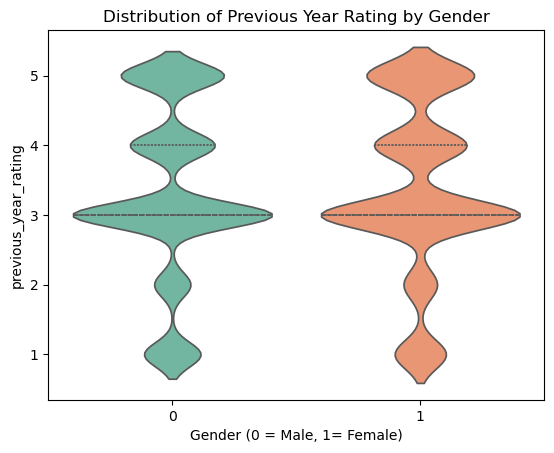

In [437]:
# Differntiate between gender wise performance rating - violin plot
sns.violinplot(data=df_test, x='gender', y='previous_year_rating', inner='quartile', palette='Set2')
plt.title('Distribution of Previous Year Rating by Gender')
plt.xlabel('Gender (0 = Male, 1= Female)')
plt.show()

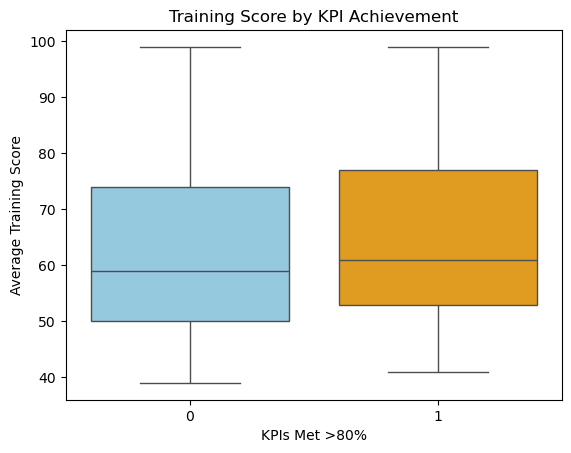

In [438]:
# Average training score based on KPI - Box plot
sns.boxplot(data=df_test, x='KPIs_met >80%', y='avg_training_score', palette=['skyblue', 'orange'])
plt.title('Training Score by KPI Achievement')
plt.xlabel('KPIs Met >80%')
plt.ylabel('Average Training Score')
plt.show()

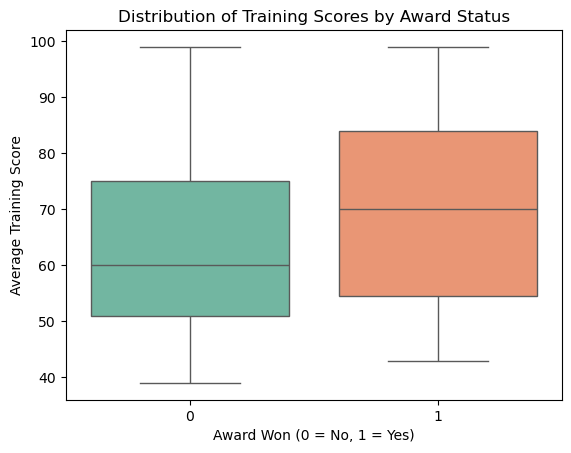

In [439]:
# Average training score grouped by award status - Box plot
sns.boxplot(data=df_test, x='awards_won?', y='avg_training_score', palette='Set2')

plt.title('Distribution of Training Scores by Award Status')
plt.xlabel('Award Won (0 = No, 1 = Yes)')
plt.ylabel('Average Training Score')
plt.show()

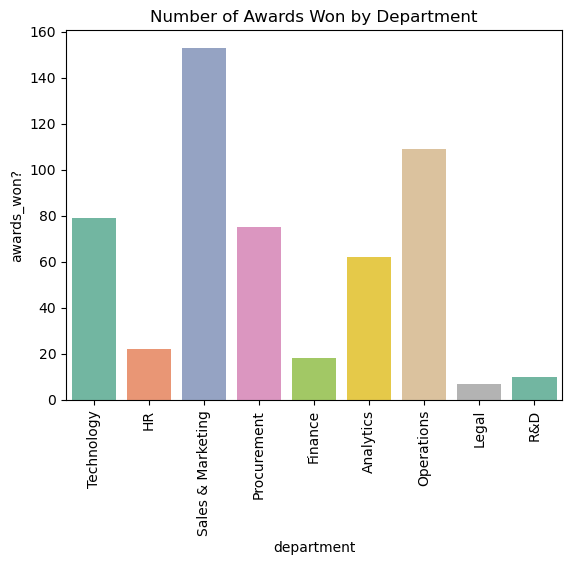

In [440]:
# Awrds won by Department - Bar plot
sns.barplot(data=df_test, x='department', y='awards_won?', estimator=sum, ci=None,palette='Set2')
plt.title('Number of Awards Won by Department')
plt.xticks(rotation=90)
plt.show()

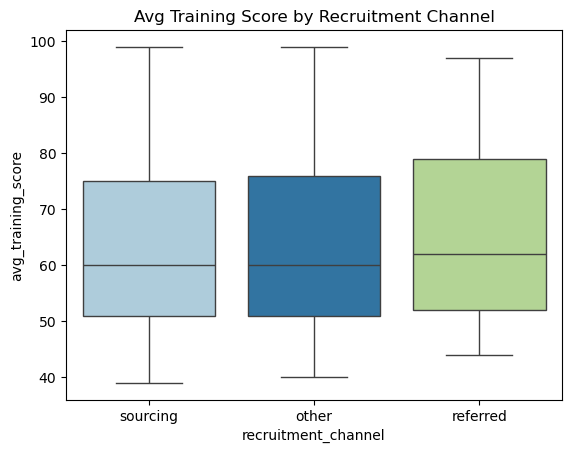

In [441]:
sns.boxplot(x='recruitment_channel', y='avg_training_score', data=df_test,palette='Paired')
plt.title('Avg Training Score by Recruitment Channel')
plt.show()

<div style="padding:10px; font-size:18px; background-color: lightblue; font-weight:bold; font-style: italic"><b> step 4.3:- Multivariate Analysis

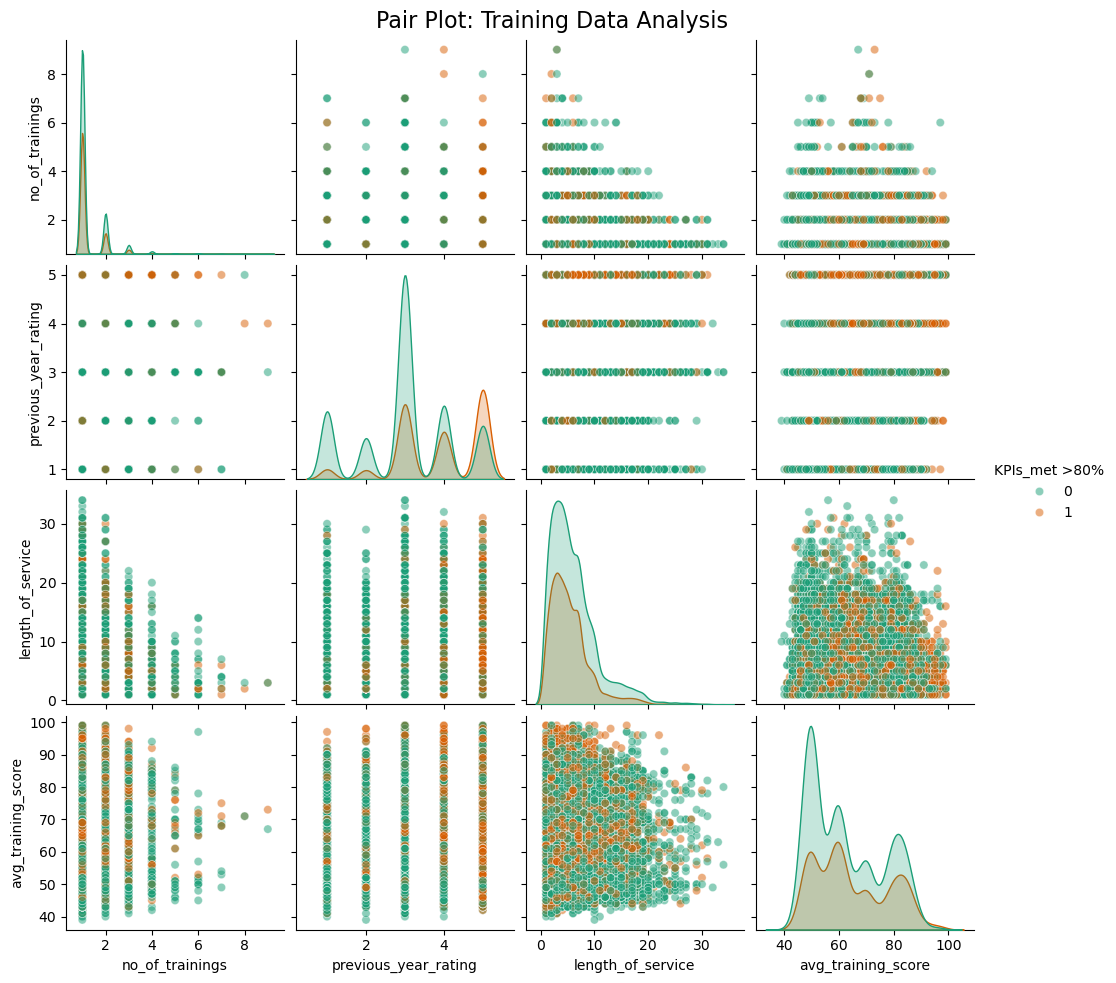

In [443]:
# Selecting columns for the pair plot
pairplot_data = df_test[['no_of_trainings', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'avg_training_score']]

# Pair plot with added customizations
sns.pairplot(pairplot_data, 
             plot_kws={'alpha': 0.5},  # Transparency of the points
             height=2.5,  # Adjust the size of each subplot
             diag_kind='kde',  # Use Kernel Density Estimation for diagonal plots
             hue='KPIs_met >80%',  # Color points based on KPIs_met >80%
             palette='Dark2')  # Color palette

# Adding labels and title
plt.suptitle("Pair Plot: Training Data Analysis", size=16)
plt.subplots_adjust(top=0.95)  # Adjust title position

# Display the plot
plt.show()

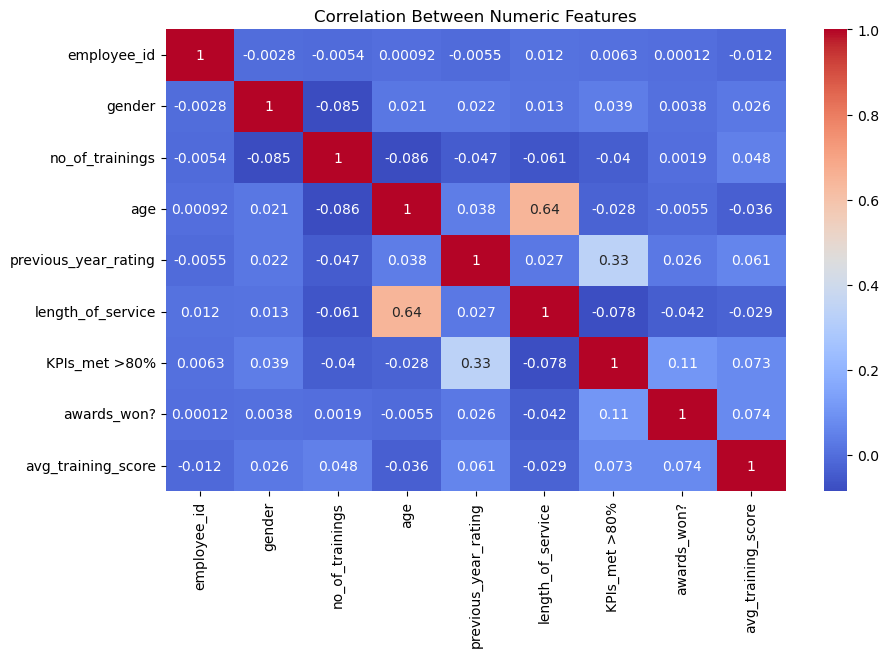

In [444]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_test.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()

**BINARY CLASSIFICATION**

Scaling of the data

In [447]:

def scale_dataset(test_data, scaler_name, target_columns):
    scaler_dict = {
        'robust': RobustScaler(),
        'standard': StandardScaler(),
        'minmax': MinMaxScaler(),
        'maxabs': MaxAbsScaler()
    }
    
    scaler = scaler_dict.get(scaler_name.lower())
    if scaler is None:
        raise ValueError(f"Scaler '{scaler_name}' not recognized. Use 'robust', 'standard', 'minmax', or 'maxabs'.")
    
    features = df_test.drop(columns=target_columns)
    targets = df_test[target_columns]
    
    numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = features.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
    
    scaled_numeric = scaler.fit_transform(features[numeric_cols])
    scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols, index=features.index)
    
    final_df = pd.concat([scaled_numeric_df, features[categorical_cols], targets], axis=1)
    return final_df


In [448]:
def plot_separate_for_scalers_and_columns(original_data, scaled_data_dict, columns):
    """
    Plot original and scaled data for each scaler AND each column separately.
    Saves separate image per (scaler, column) pair.
    """
    for scaler_name, scaled_df in scaled_data_dict.items():
        for column in columns:
            plt.figure(figsize=(10, 5))
            plt.hist(original_data[column], bins=30, alpha=0.4, label='Original')
            plt.hist(scaled_df[column], bins=30, alpha=0.4, label=f'Scaled ({scaler_name})')
            plt.title(f'{column} — Original vs {scaler_name.capitalize()} Scaled')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.legend()
            plt.tight_layout()
            plt.show()

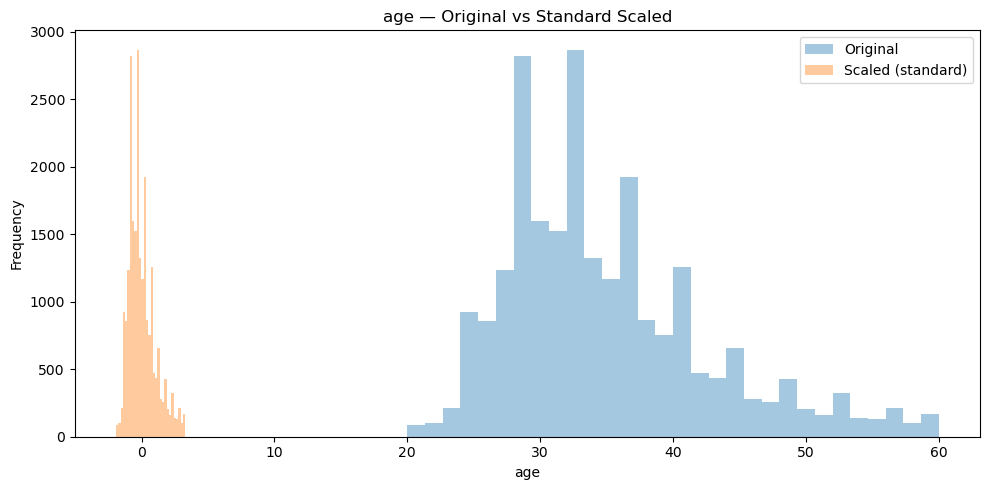

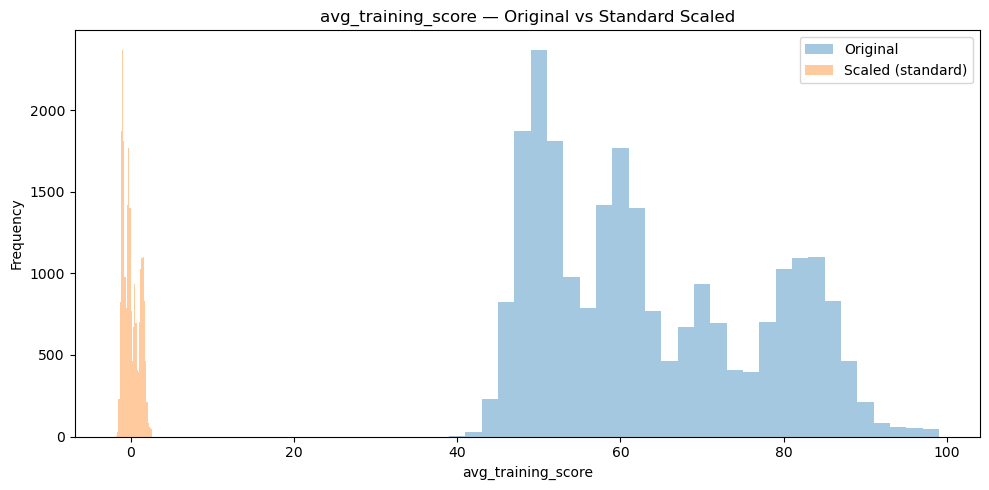

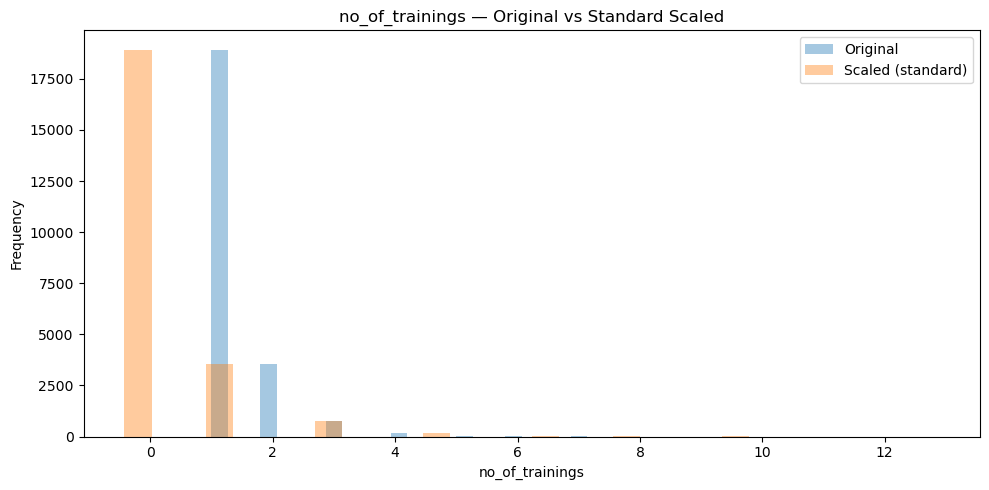

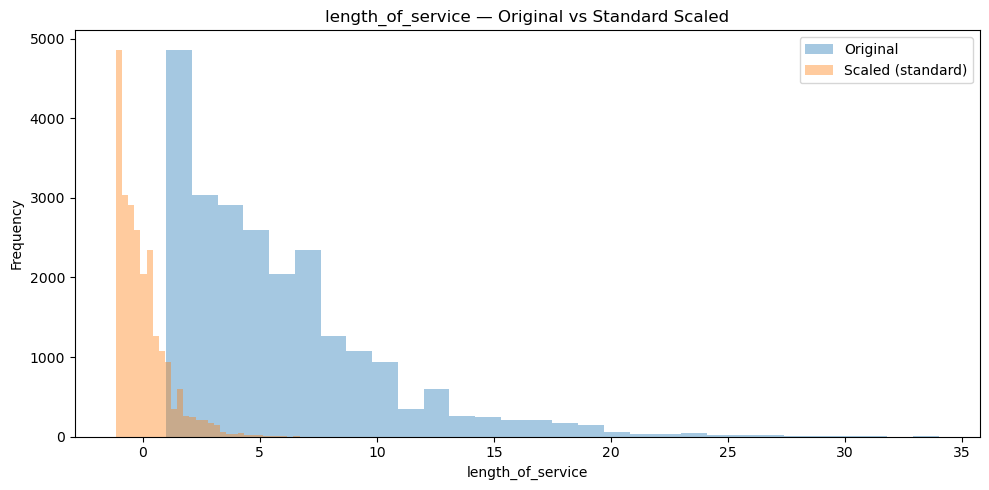

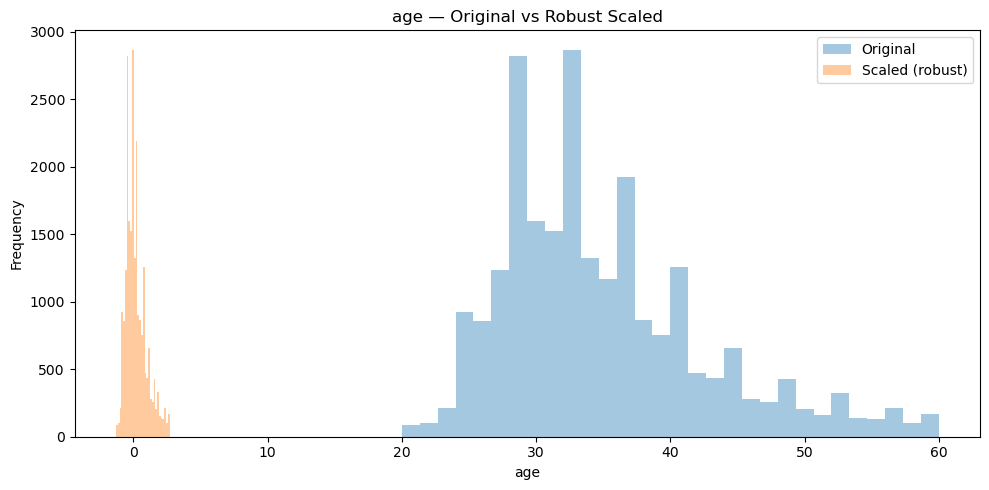

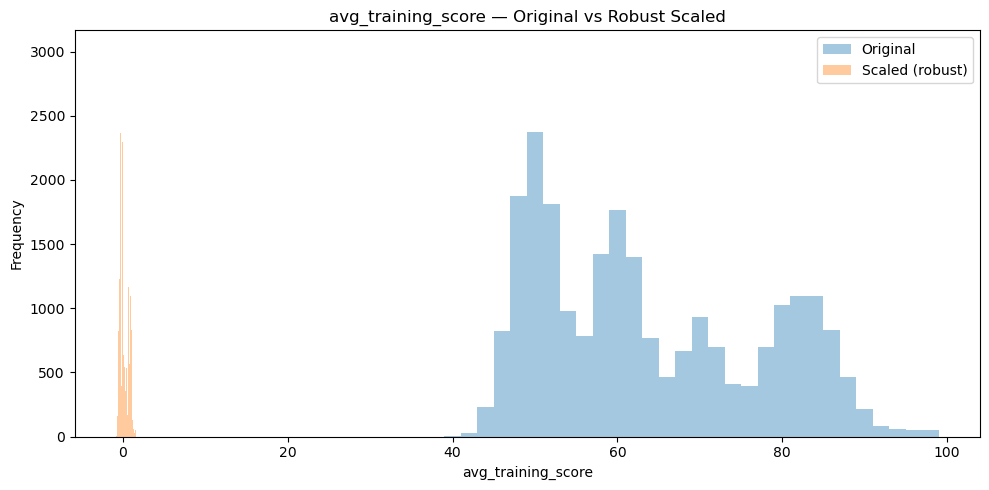

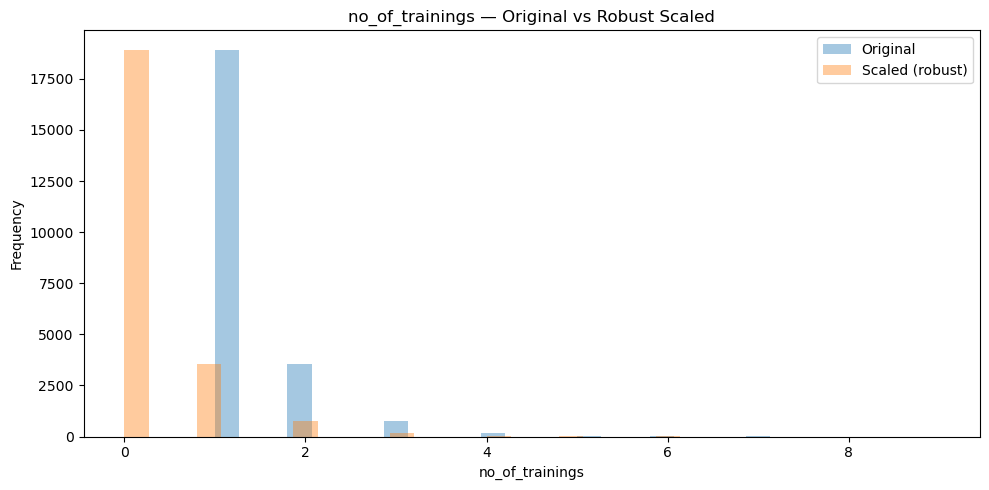

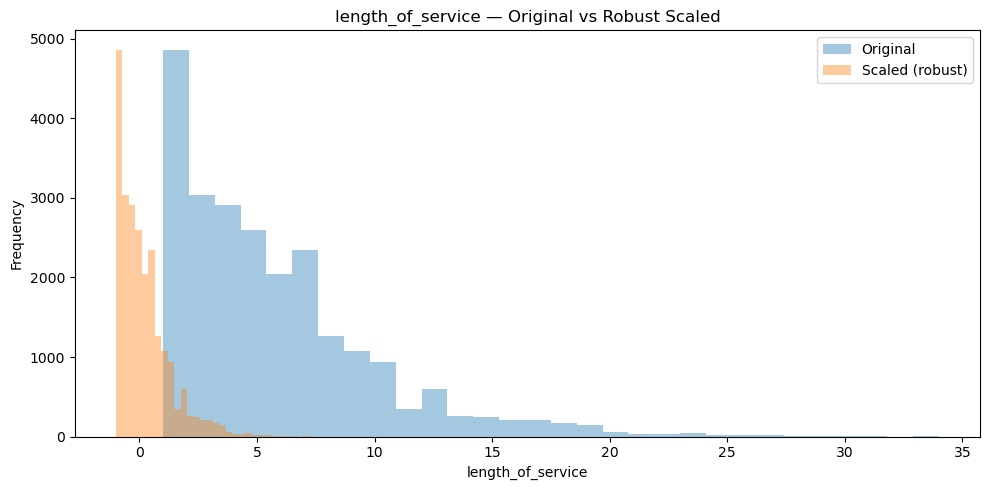

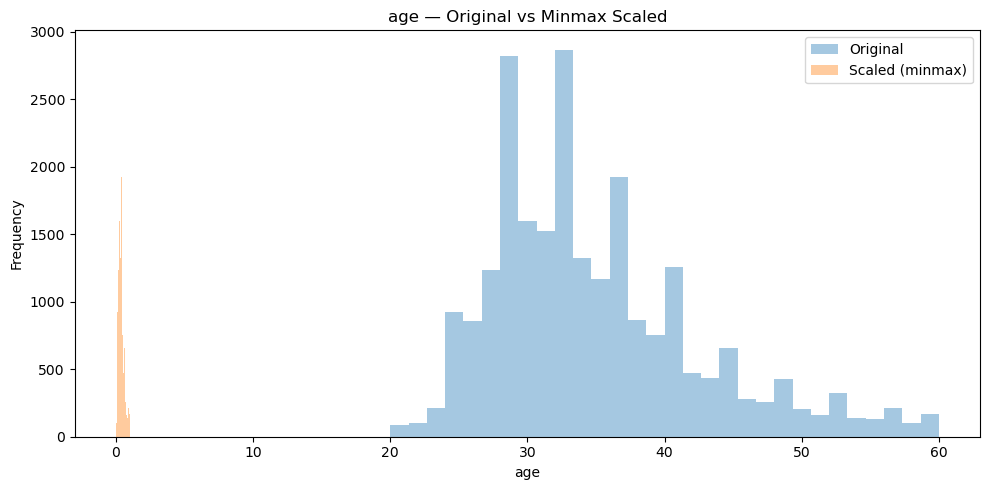

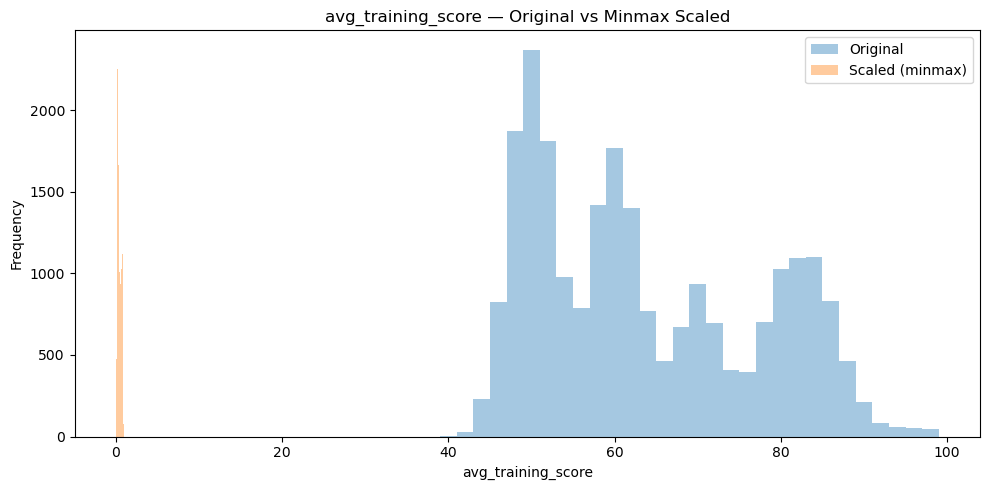

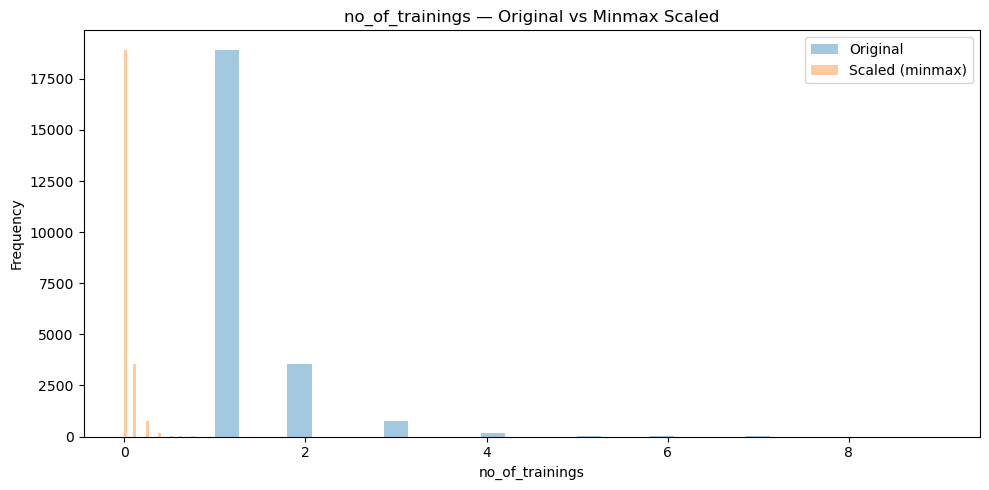

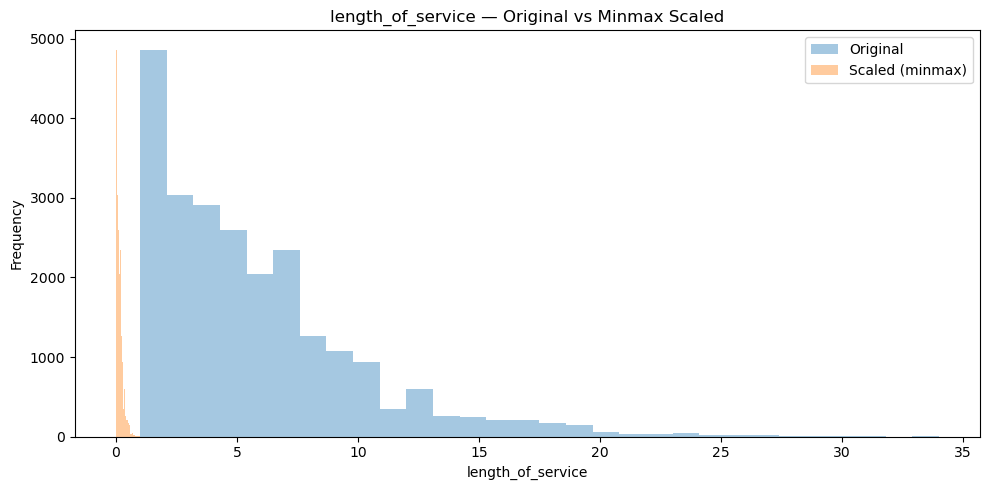

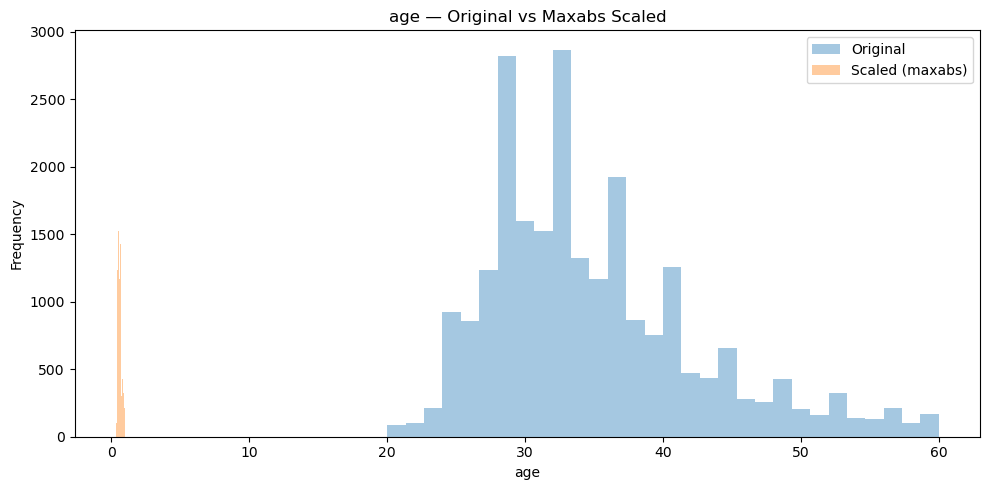

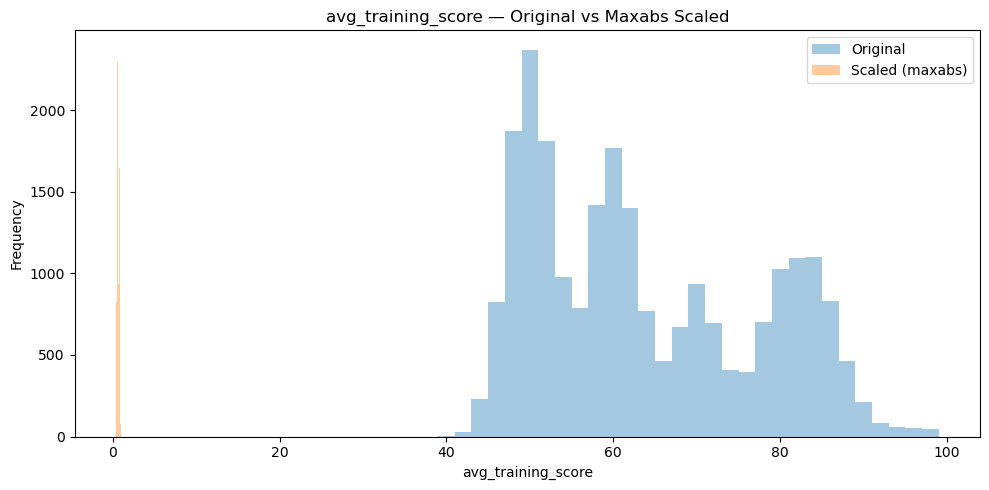

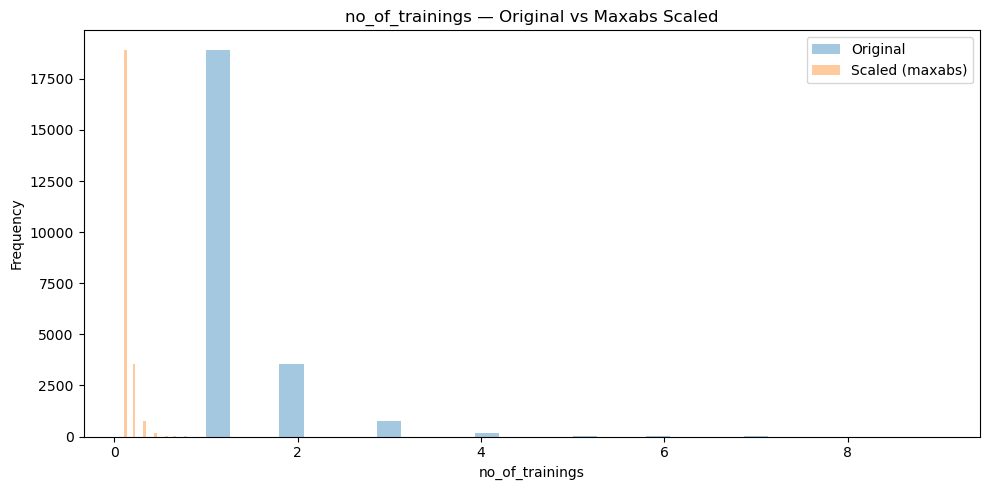

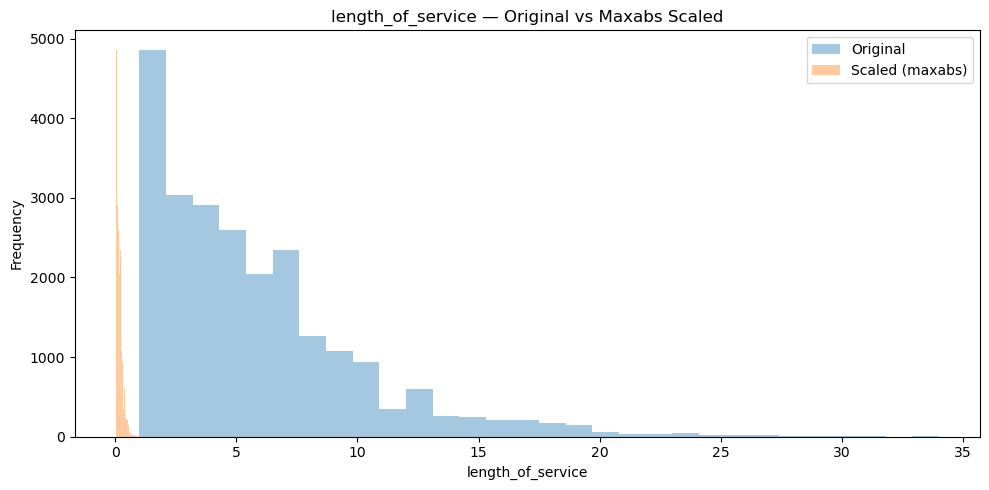

In [449]:
# Define scalers
scalers = ['standard', 'robust', 'minmax', 'maxabs']
target_cols = ['KPIs_met >80%', 'previous_year_rating']

# Scale data
scaled_datasets = {scaler: scale_dataset(df_test, scaler, target_cols) for scaler in scalers}

# Columns to visualize
columns = ['age', 'avg_training_score', 'no_of_trainings', 'length_of_service']

# Plot and save
plot_separate_for_scalers_and_columns(df_test, scaled_datasets, columns)

**The original data has been scaled as per the requirement using the scalers like Standard, Robust, MinMax, MaxAbs**

***XGBoost***

In [452]:
# Feature set
X_data = df_test[[
    "department", "education", "age", "gender", "recruitment_channel",
    "avg_training_score", "length_of_service", "awards_won?"
]]

# Binary target (no lambda needed if already 0/1)
y_data = df_test["KPIs_met >80%"]

# Encode categorical features
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = xgb_model.predict(X_test_scaled)
y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.634
AUC: 0.602
Recall: 0.193
Precision: 0.495
F1 Score: 0.277

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.89      0.75      2984
           1       0.50      0.19      0.28      1714

    accuracy                           0.63      4698
   macro avg       0.58      0.54      0.52      4698
weighted avg       0.60      0.63      0.58      4698

Confusion Matrix:
 [[2648  336]
 [1384  330]]


In [453]:
from sklearn.metrics import auc
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc:.3f}")

ROC AUC: 0.602


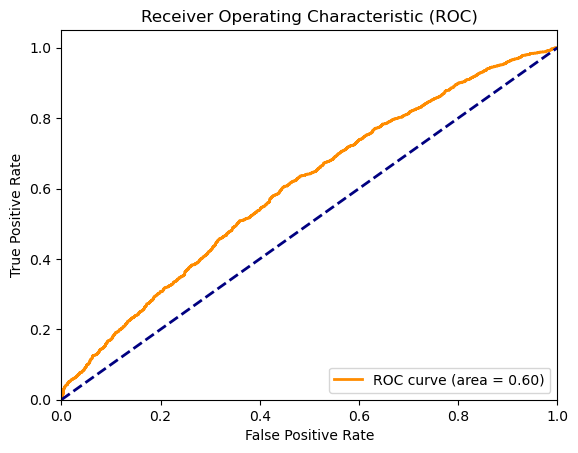

In [454]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [455]:
# Alternatively, print the feature importances
print("Feature Importances:")
for name, importance in zip(X_train.columns, xgb_model.feature_importances_):
    print(f"{name}: {importance:.4f}")

Feature Importances:
department: 0.1219
education: 0.0634
age: 0.0615
gender: 0.0661
recruitment_channel: 0.0670
avg_training_score: 0.0655
length_of_service: 0.0663
awards_won?: 0.4883


In [456]:
# Define features
X_data = df_test[[
    "department", "education", "age", "gender", "recruitment_channel",
    "avg_training_score", "length_of_service", "awards_won?"
]]

# Binary target: KPI > 80%
y_data = df_test["KPIs_met >80%"]  

# Encode categorical variables
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_scaled, y_data)

# Predict KPI met probabilities
df_test["predicted_KPI_met"] = xgb_model.predict_proba(X_scaled)[:, 1]

# Summary of predicted probabilities
print("Predicted KPI > 80% Probability - Summary:")
display(df_test["predicted_KPI_met"].describe())

# % of employees likely to meet KPI with predicted probability > 0.3
above_threshold = (df_test["predicted_KPI_met"] > 0.3).mean() * 100
print(f"\nPercentage of employees predicted to meet KPI with probability > 0.3: {above_threshold:.2f}%")

Predicted KPI > 80% Probability - Summary:


count    23490.000000
mean         0.358872
std          0.151543
min          0.005785
25%          0.260212
50%          0.348255
75%          0.441112
max          0.995816
Name: predicted_KPI_met, dtype: float64


Percentage of employees predicted to meet KPI with probability > 0.3: 64.18%


<b>CatBoost

In [458]:
# Features
X_data = df_test[[
    "department", "education", "age", "gender", "recruitment_channel",
    "avg_training_score", "length_of_service", "awards_won?"
]]

# Binary target: KPI > 80%
y_data = df_test["KPIs_met >80%"]  # 0 or 1 values

# Encode categorical columns
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# CatBoost Classifier
cat_model = CatBoostClassifier(verbose=0)  # Train without verbose output
cat_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = cat_model.predict(X_test_scaled)
y_proba = cat_model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

# Evaluate model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.640
AUC: 0.617
Recall: 0.142
Precision: 0.527
F1 Score: 0.223

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.77      2984
           1       0.53      0.14      0.22      1714

    accuracy                           0.64      4698
   macro avg       0.59      0.53      0.49      4698
weighted avg       0.61      0.64      0.57      4698

Confusion Matrix:
 [[2766  218]
 [1471  243]]


In [459]:
from sklearn.metrics import auc
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc:.3f}")

ROC AUC: 0.617


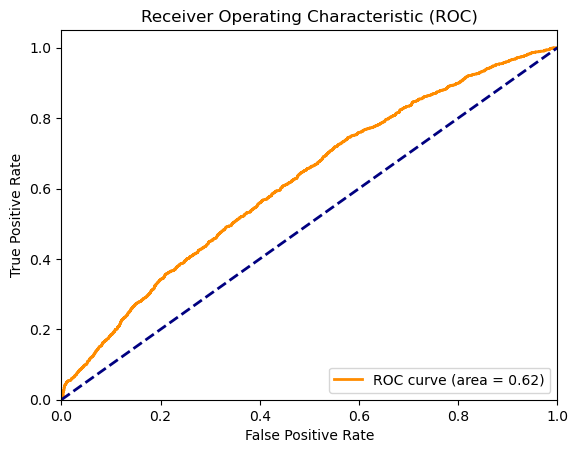

In [460]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [461]:
# Alternatively, print the feature importances
importances = cat_model.get_feature_importance()
feature_names = X_encoded.columns

# Print
print("Feature Importances (CatBoost):")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


Feature Importances (CatBoost):
department: 15.1476
education: 4.8859
age: 20.0266
gender: 5.0489
recruitment_channel: 6.9169
avg_training_score: 24.3667
length_of_service: 18.1291
awards_won?: 5.4783


In [462]:
# Encode categoricals (if you don't want CatBoost to handle them automatically)
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Fit CatBoost model
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_encoded, y_data)

# Predict probabilities for KPI > 80%
df_test["predicted_KPI_met"] = cat_model.predict_proba(X_encoded)[:, 1]

# Summary of predicted probabilities
print("Predicted KPI > 80% Probability - Summary (Performance of Employee):")
display(df_test["predicted_KPI_met"].describe())

# Calculate the percentage of individuals predicted to meet KPI > 80% with probability > 0.3
above_half = (df_test["predicted_KPI_met"] > 0.3).mean() * 100
print(f"\nPercentage of individuals predicted to meet KPI > 80% with probability > 0.3: {above_half:.2f}%")

Predicted KPI > 80% Probability - Summary (Performance of Employee):


count    23490.000000
mean         0.358744
std          0.126897
min          0.006906
25%          0.278725
50%          0.354613
75%          0.427721
max          0.965567
Name: predicted_KPI_met, dtype: float64


Percentage of individuals predicted to meet KPI > 80% with probability > 0.3: 67.89%


***LGBM***

In [464]:
#Features
X_data = df_test[[
    "department", "education", "age", "gender", "recruitment_channel",
    "avg_training_score", "length_of_service", "awards_won?"
]]

# Convert KPIs_met > 80% to binary (1 if KPI > 80%, else 0)
y_data = (df_test["KPIs_met >80%"] > 0.8).astype(int)  # KPI > 80% => 1, else 0

# Encode categorical columns
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LightGBM Classifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train_scaled, y_train)

# Predict
y_pred = lgbm_model.predict(X_test_scaled)
y_proba = lgbm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Predicted KPI probabilities for all employees
df_test["predicted_KPI_met"] = lgbm_model.predict_proba(X_encoded)[:, 1]

# Summary of predicted probabilities
print("\nPredicted KPI > 80% Probability - Summary (Performance of Employee):")
display(df_test["predicted_KPI_met"].describe())

# Calculate the percentage of individuals predicted to meet KPI > 80% with probability > 0.3
above_half = (df_test["predicted_KPI_met"] > 0.3).mean() * 100
print(f"\nPercentage of individuals predicted to meet KPI > 80% with probability > 0.3: {above_half:.2f}%")

[LightGBM] [Info] Number of positive: 6715, number of negative: 12077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357333 -> initscore=-0.586959
[LightGBM] [Info] Start training from score -0.586959
Accuracy: 0.641
AUC: 0.611
Recall: 0.128
Precision: 0.534
F1 Score: 0.207

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.94      0.77      2984
           1       0.53      0.13      0.21      1714

    accuracy                           0.64      4698
   macro avg       0.59      0.53      0.49      4698
weighted avg       0.61      0.64      0.56      4698

Confusion Matrix:
 

count    23490.000000
mean         0.313112
std          0.135503
min          0.148305
25%          0.216336
50%          0.275714
75%          0.353968
max          0.813326
Name: predicted_KPI_met, dtype: float64


Percentage of individuals predicted to meet KPI > 80% with probability > 0.3: 33.59%


In [465]:
from sklearn.metrics import auc
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc:.3f}")

ROC AUC: 0.611


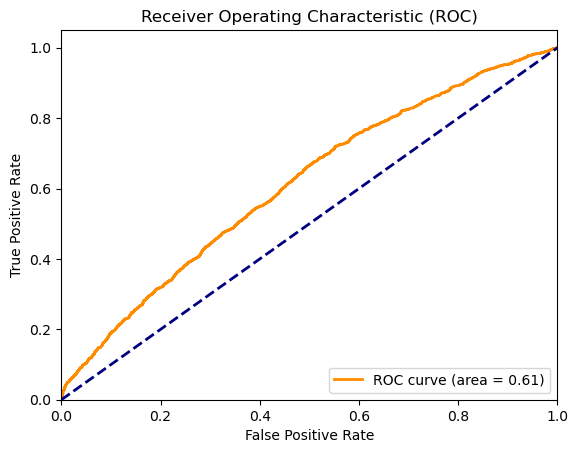

In [466]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [467]:
importances = lgbm_model.feature_importances_
feature_names = X_encoded.columns

print("Feature Importances (LightGBM):")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

Feature Importances (LightGBM):
department: 255.0000
education: 124.0000
age: 819.0000
gender: 133.0000
recruitment_channel: 180.0000
avg_training_score: 863.0000
length_of_service: 556.0000
awards_won?: 70.0000


In [468]:
# Encode categoricals (LightGBM doesn't handle strings automatically)
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Fit LightGBM model
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_encoded, y_data)

# Predict probabilities
df_test["predicted_KPI_met"] = lgbm_model.predict_proba(X_encoded)[:, 1]

# Summary
print("Predicted KPI > 80% Probability - Summary (Performance of Employee):")
display(df_test["predicted_KPI_met"].describe())

# Percentage above threshold
above_threshold = (df_test["predicted_KPI_met"] > 0.3).mean() * 100
print(f"\nPercentage of individuals predicted to meet KPI > 80% with probability > 0.3: {above_threshold:.2f}%")

[LightGBM] [Info] Number of positive: 8429, number of negative: 15061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 155
[LightGBM] [Info] Number of data points in the train set: 23490, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358834 -> initscore=-0.580430
[LightGBM] [Info] Start training from score -0.580430
Predicted KPI > 80% Probability - Summary (Performance of Employee):


count    23490.000000
mean         0.358860
std          0.116778
min          0.051437
25%          0.281521
50%          0.359041
75%          0.418718
max          0.970805
Name: predicted_KPI_met, dtype: float64


Percentage of individuals predicted to meet KPI > 80% with probability > 0.3: 68.80%


***RESULTS***

In [470]:
# Initialize a list to hold the results
results = []

# Loop through scalers
for scaler_name, scaled_df in scaled_datasets.items():
    # Prepare features
    X_data = scaled_df[[
        "department", "education", "age", "gender", "recruitment_channel",
        "avg_training_score", "length_of_service", "awards_won?"
    ]]

    # Use previous_year_rating as the target (binary classification: 1 if rating ≥ 4, else 0)
    y_data = scaled_df["previous_year_rating"].apply(lambda x: 1 if x >= 3 else 0)

    # Encode categoricals
    X_encoded = X_data.copy()
    categorical_cols = ["department", "education", "gender", "recruitment_channel"]
    le = LabelEncoder()
    for col in categorical_cols:
        X_encoded[col] = le.fit_transform(X_encoded[col])

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

    # Scale features using the selected scaler
    scaler = scaler_dict[scaler_name.lower()]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({
        'Scaler': scaler_name,
        'Model': 'XGBoost',
        'Accuracy': accuracy,
        'AUC-ROC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort by accuracy (or any other metric)
best_results = results_df.sort_values(by='Accuracy', ascending=False)

# Display the best results
print("Best Results (Highest Accuracy):")
print(best_results.head())

# Document the best scaler and model combination
best_scaler_model = best_results.iloc[0]
print("\nBest Scaler and Model Combination:")
print(f"Scaler: {best_scaler_model['Scaler']}")
print(f"Model: {best_scaler_model['Model']}")
print(f"Accuracy: {best_scaler_model['Accuracy']}")
print(f"Precision: {best_scaler_model['Precision']}")
print(f"Recall: {best_scaler_model['Recall']}")
print(f"F1 Score: {best_scaler_model['F1 Score']}")
print(f"AUC-ROC: {best_scaler_model['AUC-ROC']}")

# Confusion Matrix
print(f"Confusion Matrix for Best Model:\n{best_scaler_model['Confusion Matrix']}")

Best Results (Highest Accuracy):
     Scaler    Model  Accuracy  AUC-ROC  Precision    Recall  F1 Score  \
0  standard  XGBoost  0.802895   0.6366   0.810653  0.987392  0.890336   
1    robust  XGBoost  0.802895   0.6366   0.810653  0.987392  0.890336   
2    minmax  XGBoost  0.802895   0.6366   0.810653  0.987392  0.890336   
3    maxabs  XGBoost  0.802895   0.6366   0.810653  0.987392  0.890336   

          Confusion Matrix  
0  [[13, 878], [48, 3759]]  
1  [[13, 878], [48, 3759]]  
2  [[13, 878], [48, 3759]]  
3  [[13, 878], [48, 3759]]  

Best Scaler and Model Combination:
Scaler: standard
Model: XGBoost
Accuracy: 0.8028948488718604
Precision: 0.8106534397239594
Recall: 0.987391646966115
F1 Score: 0.8903363334912364
AUC-ROC: 0.6365999250597798
Confusion Matrix for Best Model:
[[  13  878]
 [  48 3759]]


In [471]:
# Initialize a list to hold the results
# RESULTS AND BEST PREDICTED
scaler_dict = {
    'robust': RobustScaler(),
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'maxabs': MaxAbsScaler()
}
# Initialize a list to hold the results
results = []

# Loop through scalers
for scaler_name, scaled_df in scaled_datasets.items():
    # Prepare data
    X_data = scaled_df[[
        "department", "education", "age", "gender", "recruitment_channel",
        "avg_training_score", "length_of_service", "awards_won?"
    ]]
    
    # Change target to previous_year_rating
    y_data = scaled_df["previous_year_rating"].apply(lambda x: 1 if x >= 3 else 0)
    
    # Encode categoricals
    X_encoded = X_data.copy()
    categorical_cols = ["department", "education", "gender", "recruitment_channel"]
    le = LabelEncoder()
    for col in categorical_cols:
        X_encoded[col] = le.fit_transform(X_encoded[col])
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

    # Scale features using the selected scaler
    scaler = scaler_dict[scaler_name.lower()]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # CatBoost
    cat_model = CatBoostClassifier(verbose=0)
    cat_model.fit(X_train_scaled, y_train)

    y_pred = cat_model.predict(X_test_scaled)
    y_proba = cat_model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({
        'Scaler': scaler_name,
        'Model': 'CatBoost',
        'Accuracy': accuracy,
        'AUC-ROC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort by accuracy (or any other metric you prefer)
best_results = results_df.sort_values(by='Accuracy', ascending=False)

# Display the best results
print("Best Results (Highest Accuracy):")
print(best_results.head())

# Document the best scaler and model combination
best_scaler_model = best_results.iloc[0]
print("\nBest Scaler and Model Combination:")
print(f"Scaler: {best_scaler_model['Scaler']}")
print(f"Model: {best_scaler_model['Model']}")
print(f"Accuracy: {best_scaler_model['Accuracy']}")
print(f"Precision: {best_scaler_model['Precision']}")
print(f"Recall: {best_scaler_model['Recall']}")
print(f"F1 Score: {best_scaler_model['F1 Score']}")
print(f"AUC-ROC: {best_scaler_model['AUC-ROC']}")

# Optionally, you can visualize the confusion matrix for the best model
print(f"Confusion Matrix for Best Model:\n{best_scaler_model['Confusion Matrix']}")

Best Results (Highest Accuracy):
     Scaler     Model  Accuracy  AUC-ROC  Precision    Recall  F1 Score  \
0  standard  CatBoost  0.808855  0.65171   0.810857  0.996585  0.894179   
1    robust  CatBoost  0.808855  0.65171   0.810857  0.996585  0.894179   
2    minmax  CatBoost  0.808855  0.65171   0.810857  0.996585  0.894179   
3    maxabs  CatBoost  0.808855  0.65171   0.810857  0.996585  0.894179   

         Confusion Matrix  
0  [[6, 885], [13, 3794]]  
1  [[6, 885], [13, 3794]]  
2  [[6, 885], [13, 3794]]  
3  [[6, 885], [13, 3794]]  

Best Scaler and Model Combination:
Scaler: standard
Model: CatBoost
Accuracy: 0.8088548318433376
Precision: 0.8108570207309254
Recall: 0.9965852377199895
F1 Score: 0.8941786471835965
AUC-ROC: 0.6517101670765973
Confusion Matrix for Best Model:
[[   6  885]
 [  13 3794]]


In [472]:
# Initialize a list to hold the results
# BGBOOST RESULTS AND BEST PREDICTED
scaler_dict = {
    'robust': RobustScaler(),
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'maxabs': MaxAbsScaler()
}

# Initialize a list to hold the results
results = []

# Loop through scalers
for scaler_name, scaled_df in scaled_datasets.items():
    # Prepare data
    X_data = scaled_df[[
        "department", "education", "age", "gender", "recruitment_channel",
        "avg_training_score", "length_of_service", "awards_won?"
    ]]
    
    # Set target to previous_year_rating (binary: 1 if >= 4, else 0)
    y_data = scaled_df["previous_year_rating"].apply(lambda x: 1 if x >= 3 else 0)
    
    # Encode categoricals
    X_encoded = X_data.copy()
    categorical_cols = ["department", "education", "gender", "recruitment_channel"]
    le = LabelEncoder()
    for col in categorical_cols:
        X_encoded[col] = le.fit_transform(X_encoded[col])
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

    # Scale features using the selected scaler
    scaler = scaler_dict[scaler_name.lower()]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # LightGBM
    lgbm_model = LGBMClassifier()
    lgbm_model.fit(X_train_scaled, y_train)
    
    y_pred = lgbm_model.predict(X_test_scaled)
    y_proba = lgbm_model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({
        'Scaler': scaler_name,
        'Model': 'LightGBM',
        'Accuracy': accuracy,
        'AUC-ROC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort by accuracy (or any other metric you prefer)
best_results = results_df.sort_values(by='Accuracy', ascending=False)

# Display the best results
print("Best Results (Highest Accuracy):")
print(best_results.head())

# Document the best scaler and model combination
best_scaler_model = best_results.iloc[0]
print("\nBest Scaler and Model Combination:")
print(f"Scaler: {best_scaler_model['Scaler']}")
print(f"Model: {best_scaler_model['Model']}")
print(f"Accuracy: {best_scaler_model['Accuracy']}")
print(f"Precision: {best_scaler_model['Precision']}")
print(f"Recall: {best_scaler_model['Recall']}")
print(f"F1 Score: {best_scaler_model['F1 Score']}")
print(f"AUC-ROC: {best_scaler_model['AUC-ROC']}")

# Optionally, you can visualize the confusion matrix for the best model
print(f"Confusion Matrix for Best Model:\n{best_scaler_model['Confusion Matrix']}")

[LightGBM] [Info] Number of positive: 15272, number of negative: 3520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.812686 -> initscore=1.467560
[LightGBM] [Info] Start training from score 1.467560
[LightGBM] [Info] Number of positive: 15272, number of negative: 3520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 8
[LightGBM] [Info] [binary:

<b>Among the three models, LightGBM with StandardScaler has the highest accuracy (81.07%), precision (81.13%), and AUC-ROC (0.659). The LightGBM model with StandardScaler has high accuracy and recall, but it could be producing too many false positives. While it performs well overall, especially in capturing high performers, it might not be as conservative in its predictions of non-high performers. The moderate AUC-ROC score suggests there's room for improvement in distinguishing between the two classes. 